In [1]:
# KNN: K-nearest neighbors algorithm used for classification and regression
# clustering is used for unsurpervised learning
# meaning that when the data the columns do not have names
# we create a clustering system in which like values are categorized in a particular way
# so we get a sense of where we want to go with the data
# the data is about breast cancer patients
# probability of a patient getting a disease  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

sns.set()

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Since there are so many columns can use a random forest classifier to find out what
# columns can be used for any analysis 
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# diagnosis is the target column
# this is what we are going to train the algorithm to do for us
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

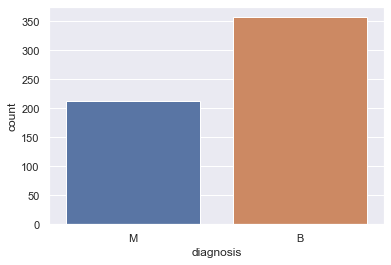

In [9]:
# how many of M vs B diagnosis 
# the labels are M and B and we cant do nothing need to turn them into numbers
sns.countplot(data = df , x = 'diagnosis')

In [10]:
# turn M and B into 0 and 1
df = pd.get_dummies(df,{'diagnosis'})

In [11]:
# creates two columns diagnosis_B and diagnosis_M
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [12]:
# create our x and y variables 
# drop columns that are not useful
# also need to drop our target columns
X = df.drop(['id','Unnamed: 32','diagnosis_B','diagnosis_M'] , axis = 1)
# focusing on one diagnosis, if its false it means the other is true
y = df['diagnosis_B']

<AxesSubplot:xlabel='diagnosis_B', ylabel='count'>

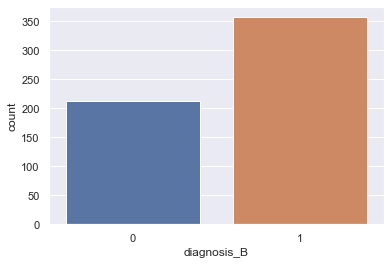

In [13]:
sns.countplot(data = df , x = 'diagnosis_B')

<AxesSubplot:xlabel='area_mean', ylabel='area_worst'>

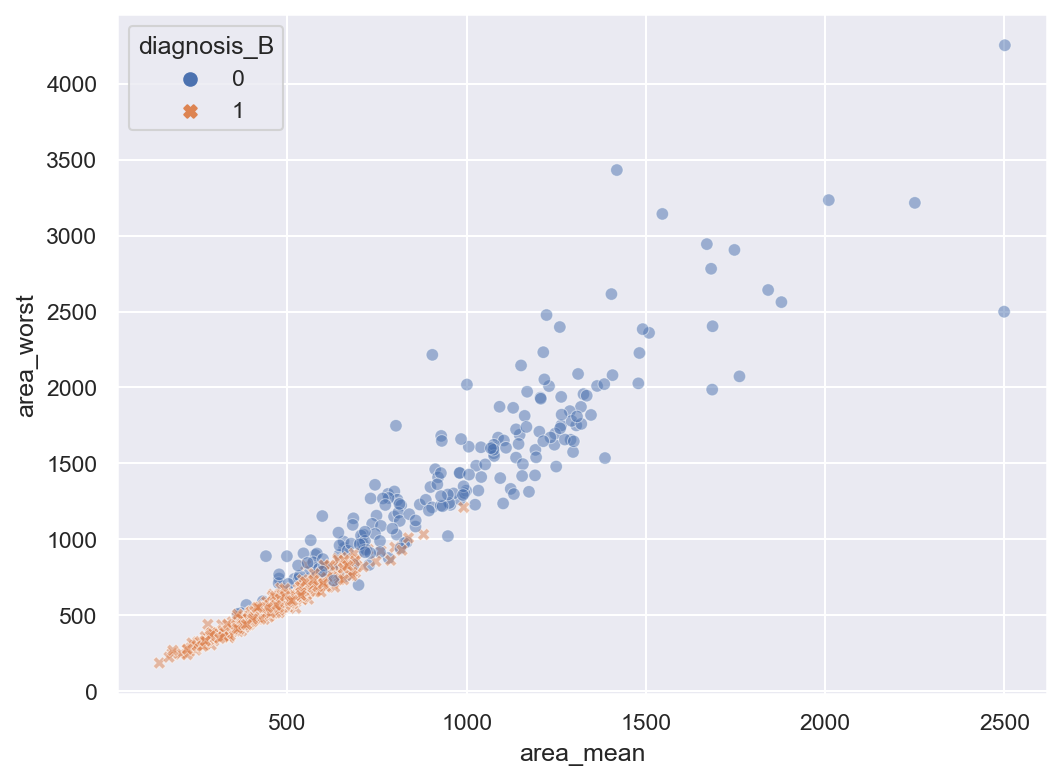

In [14]:
# create a scatter plot
plt.figure(figsize = (8,6),dpi =150)
sns.scatterplot(data = df , x ='area_mean' ,y='area_worst',hue = 'diagnosis_B',alpha=0.5,style = 'diagnosis_B')

In [15]:
# split the data
# cutting it real close with the test size, could be problematic, close to overfitting
# not advisable to do 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [16]:
# the data does not have a specific range
# different decimal points for each column
# means the data is not standarized
# the range of numbers is not similar to one column to the next
# make the work of an algorithm as easy as possible 
# this is possible using StandardScaler class
# first instantiate the class
scaler = StandardScaler()

In [17]:
# then train it
# its going take all the columns and find a range that can accomdate all columns 
# and put all columns in that range
scaler.fit(X_train)

StandardScaler()

In [18]:
# once its train use it to transform the data 
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [19]:
# Before getting into clustering need to see what algorithm we want to use to compare later
# instantiate the class
log_model = LogisticRegression()

In [20]:
# train the model
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [21]:
# create prediction array
y_pred = log_model.predict(scaled_x_test)

In [22]:
# precision score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.98      1.00      0.99        40

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



In [23]:
# simply call the accuracy score with the new class accuracy_score
accuracy_score(y_test,y_pred)

0.9824561403508771

In [24]:
# can we do better than 98% this is when we implement KNN
# in order to get a better prediction compared to our logistic regression
# since the data is already clean and scaled we can get to the instatiating the model
# how do know how many neighbors to use? You dont! using 5 for a base
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [25]:
# train the model
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier()

In [26]:
# predictor
K_N_Y_pred = knn_model.predict(scaled_x_test)

In [27]:
k_value5_accuracy_score = accuracy_score(y_test,K_N_Y_pred)
k_value5_accuracy_score

0.9298245614035088

In [28]:
# we got back 92% which is less than the 98% of the logistic regression model
# one caviat we chose 5 clusters (n_neighbors=5) simple to see where we landed
# can we improve these algorithm to perform better
# create a function that allows us to determine the number of clusters we can use
# there for increasing our probability for better accuracy

# new array aka empty list
test_error_rates = []
# k = clusters
# going to train the algorithm from 1 to 30
# we are going to run it 30 times with 30 clusters
# going to see what cluster gives us the higher error rate
# the higher the error the lower the accuracy 
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train , y_train)

    y_pred_test = knn_model.predict(scaled_x_test)
    test_error = 1- accuracy_score(y_test ,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neigbors')

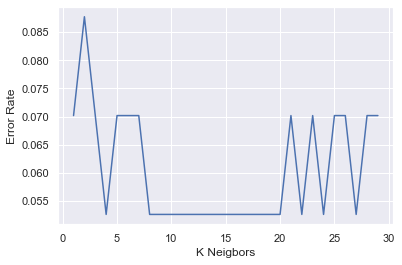

In [29]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neigbors')

In [36]:
# we can chose based on the plot above using any of the clusters with the less error rate
# to train the same algorithm to use 27 clusters and except a bit more accurate
knn_2ndmodel = KNeighborsClassifier(n_neighbors=27)

In [37]:
# train the model 
knn_2ndmodel.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [38]:
# run our prediction
y_pred = knn_2ndmodel.predict(scaled_x_test)

In [39]:
k_value27_accuracy_score = accuracy_score(y_test,y_pred)
k_value27_accuracy_score

0.9473684210526315